# Chapter 2

## Bag of Words

**O que é um saco de palavras (BOW)?**

Começamos com um método básico e bruto, mas geralmente bastante útil, chamado saco de palavras (BOW). Uma abordagem de saco de palavras descreve a ocorrência, ou frequência, de palavras em um documento ou em uma coleção de documentos (chamada corpus). Basicamente, trata-se de construir um vocabulário de todas as palavras que ocorrem no documento e manter o controle de suas frequências.


Antes de continuarmos com a discussão sobre BOW, apresentaremos os dados que usaremos ao longo do capítulo, ou seja, análises de produtos da Amazon. 

O conjunto de dados consiste em duas colunas: 

* a primeira contém a pontuação, que é 1 se positiva e 0 se negativa
* A segunda coluna contém a revisão real do produto.


In [1]:
import pandas as pd

In [10]:
df = pd.read_csv('dataset/amazon_reviews_sample.csv')

In [11]:
df.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


**Análise de sentimento com BOW: Exemplo**


Imagine que você tenha a seguinte string: 

"This is the best book ever. I loved the book and highly recommend it!!!"

O objetivo de uma abordagem BOW seria construir a seguinte saída semelhante a um dicionário: 

* 'This', ocorre uma vez em nossa string, então tem uma contagem de 1, 
* 'is' ocorre uma vez, 
* 'the' ocorre duas vezes e assim por diante . 

Uma coisa a notar é que perdemos a ordem das palavras e as regras gramaticais, é por isso que esta abordagem é chamada de "saco" de palavras, semelhante a jogar um monte de itens em um saco e perder qualquer sentido de sua ordem. Isso parece simples, mas às vezes decidir como construir o vocabulário pode ser complexo. Discutimos algumas das compensações que precisamos considerar em capítulos posteriores.

**Resultado final da BOW**

Quando transformamos a coluna de texto com um BOW, o resultado final se parece com a tabela que vemos: 


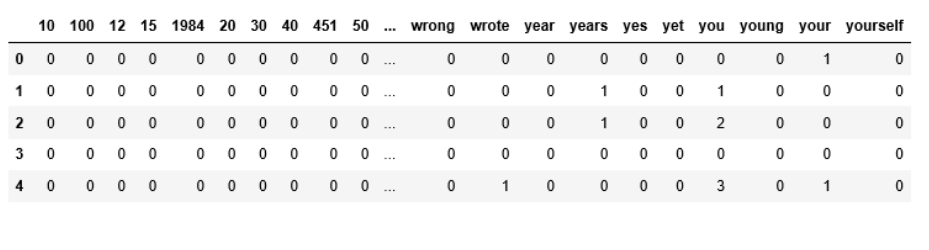

onde a coluna é a palavra (também chamada de token), e a linha representa quantas vezes a encontramos na respectiva revisão.

**Função CountVectorizer**

Como executamos um processo BOW em Python? 

A maneira mais simples de fazer isso é usando o CountVectorizer da biblioteca de texto no submódulo sklearn.feature_extraction. 

* Em Python, importamos o `CountVectorizer ()` de `sklearn.feature_extraction.text`. 
* Na função CountVectorizer, por enquanto deixamos as opções funcionais padrão, exceto para o argumento max_features, que considera apenas os recursos com maior frequência de termo, ou seja, ele escolherá as 1000 palavras mais frequentes em todo o corpus de avaliações. 
    * Precisamos fazer isso às vezes por causa do consumo de memória. 
* Usamos o método `fit ()` do CountVectorizer, chamando `fit ()` em nossa coluna de texto. 
* Para criar uma representação BOW, chamamos o método `transform ()`, aplicado novamente à nossa coluna de texto.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
vect = CountVectorizer(max_features=1000)
vect.fit(df['review'])

CountVectorizer(max_features=1000)

In [13]:
X = vect.transform(df['review'])

In [14]:
X

<10000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 406668 stored elements in Compressed Sparse Row format>

O resultado é uma matriz esparsa. 
Uma matriz esparsa armazena apenas entidades diferentes de zero, onde as linhas correspondem ao número de linhas no conjunto de dados e as colunas ao vocabulário BOW.

**Transformando o vetorizador**

Para examinar o conteúdo real de uma matriz esparsa, precisamos realizar uma etapa adicional para transformá-la de volta em uma matriz NumPy 'densa', usando o método `.toarray ()`. Podemos construir um DataFrame do pandas a partir do array, onde os nomes das colunas são obtidos do método `.get_feature_names ()` do vetorizador. Isso retorna uma lista onde cada entrada corresponde a um recurso.

In [15]:
my_array = X.toarray()

In [17]:
X_df = pd.DataFrame(my_array, columns= vect.get_feature_names())

In [18]:
X_df

,10,100,12,15,1984,20,30,40,451,50,...,wrong,wrote,year,years,yes,yet,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Your first BOW

In [19]:
annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Build the vectorizer and fit it
anna_vect =  CountVectorizer()
anna_vect.fit(annak)

# Create the bow representation
anna_bow = anna_vect.transform(annak)

# Print the bag-of-words result 
print(anna_bow.toarray())

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


### BOW using product reviews

In [20]:
anna_array = anna_bow.toarray()

In [21]:
anna_df = pd.DataFrame(anna_array, columns= anna_vect.get_feature_names())
anna_df

,alike,all,are,every,families,family,happy,in,is,its,own,unhappy,way
0,1,1,1,0,1,0,1,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,1,1,1,2,1


### Getting granular with n-grams

Imagine que você tem uma frase como 'I am happy, not sad' e outra 'I am sad, not happy'. Eles terão a mesma representação com uma BOW, embora os significados estejam invertidos. Nesse caso, colocar NOT antes da palavra (também chamado de negação) altera todo o significado e demonstra por que o contexto é importante.


Existe uma maneira de capturar o contexto ao usar uma BOW, por exemplo, considerando pares ou triplos de tokens que aparecem um ao lado do outro. Vamos definir alguns termos. Tokens únicos são o que usamos até agora e também são chamados de 'unigramas'. Bigramas são pares de tokens, trigramas são triplos de tokens e uma sequência de n-tokens é chamada de 'n-gramas.'


Vamos ilustrar isso com um exemplo.

Pegue a frase 'The weather today is wonderful' e divida-a usando unigramas, bigramas e trigramas. Com os unigramas, temos tokens únicos, com bigramas, pares de tokens vizinhos, com trigramas: triplos de tokens vizinhos.

**n-gramas com o CountVectorizer**

É fácil implementar n-gramas com o método CountVectorizer. 

Para especificar os n-gramas, usamos o parâmetro ngram_range. 
O ngram_range é uma tupla em que o primeiro parâmetro é o comprimento mínimo e o segundo parâmetro é o comprimento máximo dos tokens. 

Por exemplo, ngram_range = (1, 1) significa que usaremos apenas unigramas, (1, 2) significa que usaremos unigramas e bigramas e assim por diante.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
min_n = 1
max_n = 3

vect = CountVectorizer(ngram_range=(min_n,max_n))

**Qual é o melhor n?**

Não é fácil determinar qual é a sequência ideal que você deve usar para o seu problema. Se usarmos uma sequência de tokens mais longa, isso resultará em mais recursos. Em princípio, o número de bigramas poderia ser o número de unigramas ao quadrado; trigramas, o número de unigramas elevado à potência de 3 e assim por diante. Em geral, ter sequências mais longas resulta em modelos de aprendizado de máquina mais precisos, mas isso também aumenta o risco de overfitting. Uma abordagem para encontrar o comprimento de sequência ideal seria tentar diferentes comprimentos em algo como uma pesquisa de grade e ver quais resultados no melhor modelo.


Determinar o comprimento da sequência de tokens não é a única maneira de determinar o tamanho do vocabulário. 

Existem alguns parâmetros no CountVectorizer que também podem fazer isso. Você deve se lembrar que definimos o parâmetro max_features. 

* `max_features`:  podem dizer ao CountVectorizer para pegar os tokens mais frequentes no corpus. Se for definido como None, todas as palavras do corpus serão incluídas. Portanto, este parâmetro pode remover palavras raras, o que dependendo do contexto pode ou não ser uma boa ideia. 

* `max_df`: Se fornecido, diz ao CountVectorizer para ignorar os termos com uma frequência maior do que a fornecida. Podemos especificá-lo como um inteiro - que será uma contagem absoluta, ou float - que será uma proporção. O valor padrão de max_df é 1.0, o que significa que ele não ignora nenhum termo. 

* `min_df` É usado para remover termos que aparecem com pouca frequência. Novamente, ele pode ser especificado como um inteiro, caso em que será uma contagem ou um número flutuante, caso em que será uma proporção. O valor padrão é 1, que significa "ignore os termos que aparecem em menos de 1 documento". Portanto, a configuração padrão não ignora nenhum termo.

In [25]:
# Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(ngram_range=(1,2))
vect.fit(df['review'])

# Transform the review column
X_review = vect.transform(df['review'])

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  00 and  00 apiece  00 as  00 back  00 bad  00 bucks  00 cheaper  00 do  \
0   0       0          0      0        0       0         0           0      0   
1   0       0          0      0        0       0         0           0      0   
2   0       0          0      0        0       0         0           0      0   
3   0       0          0      0        0       0         0           0      0   
4   0       0          0      0        0       0         0           0      0   

   00 does  ...  étai fidèle  était  était pas  étre  étre publié  éviter  \
0        0  ...            0      0          0     0            0       0   
1        0  ...            0      0          0     0            0       0   
2        0  ...            0      0          0     0            0       0   
3        0  ...            0      0          0     0            0       0   
4        0  ...            0      0          0     0            0       0   

   última  última parte  única  única opción  
0  

### Size of vocabulary of movies reviews

In [26]:
from sklearn.feature_extraction.text import CountVectorizer 

In [27]:
#Using the movies dataset, limit the size of the vocabulary to 100

vect = CountVectorizer(max_features=100)
vect.fit(df['review'])

X_review = vect.transform(df['review'])
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())

print(X_df.head())

   about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]


In [29]:
# Using the movies dataset, limit the size of the vocabulary to include terms which occur in no more than 200 documents.

vect = CountVectorizer(max_df=200)
vect.fit(df['review'])

X_review = vect.transform(df['review'])
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())

print(X_df.head())

   00  000  001  002  00290  007  0070412901  0072316373  008  00now  ...  \
0   0    0    0    0      0    0           0           0    0      0  ...   
1   0    0    0    0      0    0           0           0    0      0  ...   
2   0    0    0    0      0    0           0           0    0      0  ...   
3   0    0    0    0      0    0           0           0    0      0  ...   
4   0    0    0    0      0    0           0           0    0      0  ...   

   zzzzzzzzzzzzzzzzzzzzz  \
0                      0   
1                      0   
2                      0   
3                      0   
4                      0   

   zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz  \
0                                                  0                              
1                                                  0                              
2                                                  0                              
3                                   

In [30]:
# Using the movies dataset, limit the size of the vocabulary to ignore terms which occur in less than 50 documents.

vect = CountVectorizer(min_df=50)
vect.fit(df['review'])

X_review = vect.transform(df['review'])
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())

print(X_df.head())

   10  100  12  15  1984  20  2nd  30  40  451  ...  year  years  yes  yet  \
0   0    0   0   0     0   0    0   0   0    0  ...     0      0    0    0   
1   0    0   0   0     0   0    0   0   0    0  ...     0      1    0    0   
2   0    0   0   0     0   0    0   0   0    0  ...     0      1    0    0   
3   0    0   0   0     0   0    0   0   0    0  ...     0      0    0    0   
4   0    0   0   0     0   0    0   0   0    0  ...     0      0    0    0   

   you  young  younger  your  yourself  zero  
0    0      0        0     1         0     0  
1    1      0        0     0         0     0  
2    2      0        0     0         0     0  
3    0      0        0     0         0     0  
4    3      0        0     1         0     0  

[5 rows x 1326 columns]


### BOW with n-grams and vocabulary size

In [31]:
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(df['review'])

X_review = vect.transform(df['review'])

X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   able to  about how  about it  about the  about this  after reading  \
0        0          0         0          0           0              0   
1        0          0         0          0           0              0   
2        0          0         0          0           0              0   
3        0          0         0          0           0              0   
4        0          0         0          0           0              0   

   after the  again and  ago and  agree with  ...  you think  you to  you ve  \
0          0          0        0           0  ...          0       0       0   
1          0          0        0           0  ...          0       0       0   
2          0          0        0           0  ...          0       0       2   
3          0          0        0           0  ...          0       0       0   
4          0          0        0           0  ...          0       0       1   

   you want  you will  you won  you would  your money  your own  your time  
0  

## Build new features from text

**Tokenização de uma string**

Lembre-se de que empregamos uma abordagem BOW para transformar cada revisão em características numéricas, contando quantas vezes uma palavra ocorreu na respectiva revisão. Aqui, paramos uma etapa antes e apenas dividimos as revisões em palavras individuais (geralmente chamadas de tokens, embora um token também possa ser uma frase inteira). Trabalharemos com o pacote nltk e, concretamente, com a função word_tokenize. 

Vamos aplicar a função word_tokenize à nossa string anna_k familiar. O resultado retornado é uma lista, onde cada item é um token da string. Observe que não apenas as palavras, mas também os sinais de pontuação são originalmente atribuídos como tokens. O mesmo teria acontecido com os dígitos, se tivéssemos algum em nossa string.

In [33]:
from nltk import word_tokenize

In [34]:
anna_k = "Happy families are all alike, every hunhappy family is unhappy in its own way."

In [35]:
word_tokenize(anna_k)

['Happy',
 'families',
 'are',
 'all',
 'alike',
 ',',
 'every',
 'hunhappy',
 'family',
 'is',
 'unhappy',
 'in',
 'its',
 'own',
 'way',
 '.']

Agora queremos aplicar a mesma lógica, mas para nossa coluna de comentários. Uma maneira rápida de iterar em strings é usando a lista de compreensão. Um rápido lembrete sobre as listas de compreensões. Eles são como loops for achatados. A sintaxe é uma operação que executamos em cada item de um objeto iterável (como uma lista). 

Em nosso caso, uma lista de compreensão nos permitirá iterar sobre a coluna de revisão, tokenizando cada revisão. O resultado será uma lista; se explorarmos o tipo do primeiro item, por exemplo, veremos que também é da lista de tipos. Isso significa que nosso word_tokens é uma lista de listas. Cada item armazena os tokens de uma única revisão.

In [36]:
# general form of list comprehension
# [expression for item in iterable]

word_tokens = [word_tokenize(review) for review in df['review']]
type(word_tokens)

list

In [37]:
type(word_tokens[0])

list

### Tokenize a string from GoT

In [39]:
from nltk import word_tokenize

In [40]:
GoT = "Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you."

In [41]:
print(word_tokenize(GoT))

['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


### Word tokens from the Avengers

In [44]:
from nltk import word_tokenize

In [42]:
avengers = ["Cause if we can't protect the Earth, you can be d*** sure we'll avenge it",
 'There was an idea to bring together a group of remarkable people, to see if we could become something more',
 "These guys come from legend, Captain. They're basically Gods."]

In [43]:
tokens_avengers = [word_tokenize(item) for item in avengers]

print(tokens_avengers)

[['Cause', 'if', 'we', 'ca', "n't", 'protect', 'the', 'Earth', ',', 'you', 'can', 'be', 'd***', 'sure', 'we', "'ll", 'avenge', 'it'], ['There', 'was', 'an', 'idea', 'to', 'bring', 'together', 'a', 'group', 'of', 'remarkable', 'people', ',', 'to', 'see', 'if', 'we', 'could', 'become', 'something', 'more'], ['These', 'guys', 'come', 'from', 'legend', ',', 'Captain', '.', 'They', "'re", 'basically', 'Gods', '.']]


### A feature for the length of a review

In [45]:
from nltk import word_tokenize

In [46]:
word_tokens = [word_tokenize(review) for review in df['review']]

print(word_tokens[0])

['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


In [47]:
len_tokens = []

for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

In [48]:
reviews['n_words'] = len_tokens 

In [49]:
reviews

,Unnamed: 0,score,review,n_words
0,0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,1,The best soundtrack ever to anything.: I'm re...,109
2,2,1,Amazing!: This soundtrack is my favorite musi...,165
3,3,1,Excellent Soundtrack: I truly like this sound...,145
4,4,1,"Remember, Pull Your Jaw Off The Floor After H...",109
...,...,...,...,...
9995,9995,1,A revelation of life in small town America in...,175
9996,9996,1,Great biography of a very interesting journal...,153
9997,9997,0,Interesting Subject; Poor Presentation: You'd...,122
9998,9998,0,Don't buy: The box looked used and it is obvi...,33


## Guess the Language

**Linguagem de uma string em Python**

Em Python, existem algumas bibliotecas que podem detectar a linguagem de uma string. Neste curso, usaremos langdetect porque é um dos pacotes de melhor desempenho. Mas você pode seguir a mesma estrutura usando outro pacote. 

Primeiro importamos a função detect_langs do pacote langdetect. Agora imagine que temos uma string de linguagem estrangeira, que é uma frase em outro idioma. Nosso objetivo é identificar seu idioma. 

Aplicamos a função detect_langs à nossa string. Esta função retornará uma lista. Cada item da lista contém um par de um idioma e um número que indica a probabilidade de a string estar neste idioma específico. Neste caso, observamos apenas 1 item da lista, nomeadamente o espanhol. Isso ocorre porque a função é quase certa de que o idioma é espanhol. Em outros casos, podemos obter listas mais longas, onde as línguas candidatas mais prováveis aparecerão em primeiro, seguidas das menos prováveis.

**Idioma de uma coluna**

Em aplicações reais, geralmente não trabalhamos com uma única string, mas com muitas strings, geralmente contidas em uma coluna de um conjunto de dados. Um problema comum é detectar o idioma de cada uma das strings e capturar o idioma mais provável em uma nova coluna. Como fazer isso? Novamente começamos importando a função detect_langs do pacote langdetect. Importamos nosso conjunto de dados familiar com análises de produtos.

In [50]:
from langdetect import detect_langs

In [51]:
foreign = 'Este libro ha sido uno de los mejores libros que he leido.'

In [52]:
detect_langs(foreign)

[es:0.9999962295379923]

**Construindo um recurso para a linguagem**

Primeiro, criamos uma lista vazia, chamada de languages. 

Queremos iterar sobre as linhas de nosso conjunto de dados usando uma lista de compreensão. 

Quando imprimimos linguagens, vemos que é uma lista de listas, onde cada elemento contém o idioma detectado da respectiva linha e a probabilidade desse idioma. Em alguns casos, as listas individuais contêm mais de um item.

In [64]:
reviews = pd.read_csv("dataset/amazon_reviews_sample.csv")
reviews = reviews[['score','review']]

In [65]:
reviews.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [66]:
languages = []

In [67]:
languages = [detect_langs(review) for review in df['review']]

In [68]:
languages

[[en:0.9999962349314374],
 [en:0.9999965627769819],
 [en:0.9999968564009172],
 [en:0.9999954615430402],
 [en:0.9999988585165063],
 [en:0.9999946294985873],
 [en:0.9999956108336965],
 [en:0.9999985461012993],
 [en:0.9999978427777361],
 [en:0.9999972428785334],
 [en:0.9999960798268909],
 [en:0.9999973370230163],
 [en:0.999996405361951],
 [en:0.9999974778989245],
 [en:0.9999966136133168],
 [en:0.999996349555879],
 [en:0.9999964787001108],
 [en:0.999997506182619],
 [en:0.9999956424832805],
 [en:0.9999982245865419],
 [en:0.9999985810746774],
 [en:0.9999971003774761],
 [en:0.999996167110679],
 [en:0.9999985236310444],
 [en:0.9999967230608048],
 [en:0.9999970999045539],
 [en:0.9999967805424137],
 [en:0.9999980652168503],
 [en:0.9999982501574972],
 [en:0.9999962930185313],
 [en:0.999996946276902],
 [en:0.9999963867923016],
 [en:0.9999980680113628],
 [en:0.9999967545402935],
 [en:0.9999976514212104],
 [en:0.9999979138628557],
 [en:0.9999963615441556],
 [en:0.9999974859548567],
 [en:0.9999982862

**Construindo um recurso para o idioma** 

Temos mais uma etapa antes de criar nosso recurso de linguagem. Vimos que idiomas é uma lista de listas. Queremos extrair o primeiro elemento de cada lista dentro dos idiomas, pois o primeiro item é sempre o idioma mais provável. 

Uma maneira rápida de fazer isso é pela compreensão de listas. Vamos dividir o comando em etapas. Por exemplo, vamos pegar o primeiro elemento dos idiomas e dividi-lo em um sinal de dois pontos. Depois disso, extraímos o primeiro elemento da divisão resultante, retornando "[es"

Por fim, como há um colchete esquerdo antes do idioma, selecionamos tudo a partir do segundo elemento, resultando em 'es' para o espanhol.

In [70]:
# transform the first list to a string and aplit on a colon

str(languages[0]).split(':')

['[en', '0.9999962349314374]']

In [71]:
str(languages[0]).split(':')[0]

'[en'

In [74]:
str(languages[0]).split(':')[0][1:]

'en'

Para escrever a compreensão da lista, reunimos essas etapas iterando cada item em nossa lista de listas. Por último, atribuímos a lista limpa a uma nova coluna, chamada language.

In [75]:
languages = [str(lang).split(':')[0][1:] for lang in languages]
reviews['language'] = languages

In [76]:
reviews.head()

,score,review,language
0,1,Stuning even for the non-gamer: This sound tr...,en
1,1,The best soundtrack ever to anything.: I'm re...,en
2,1,Amazing!: This soundtrack is my favorite musi...,en
3,1,Excellent Soundtrack: I truly like this sound...,en
4,1,"Remember, Pull Your Jaw Off The Floor After H...",en
